Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)   #
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib "inline"

#Importing models needed
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning message and removing warning
from warnings import filterwarnings
filterwarnings("ignore")

Importing Diabetes dataset from kaggle

In [2]:
data = pd.read_csv("diabetes.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Counting values and plotting graph of Diabetic and Non-Daiabetic people present in the Dataset

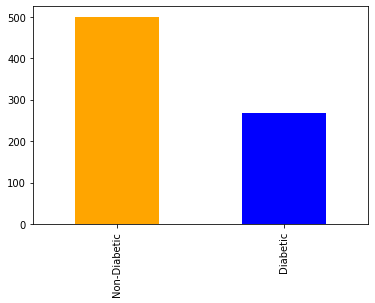

In [3]:
count=data["Outcome"].value_counts()
count.plot(kind="bar", color=["Orange","Blue"])
plt.xticks(np.arange(2),("Non-Diabetic" , "Diabetic"));

Comparision of Outcome with Glucose

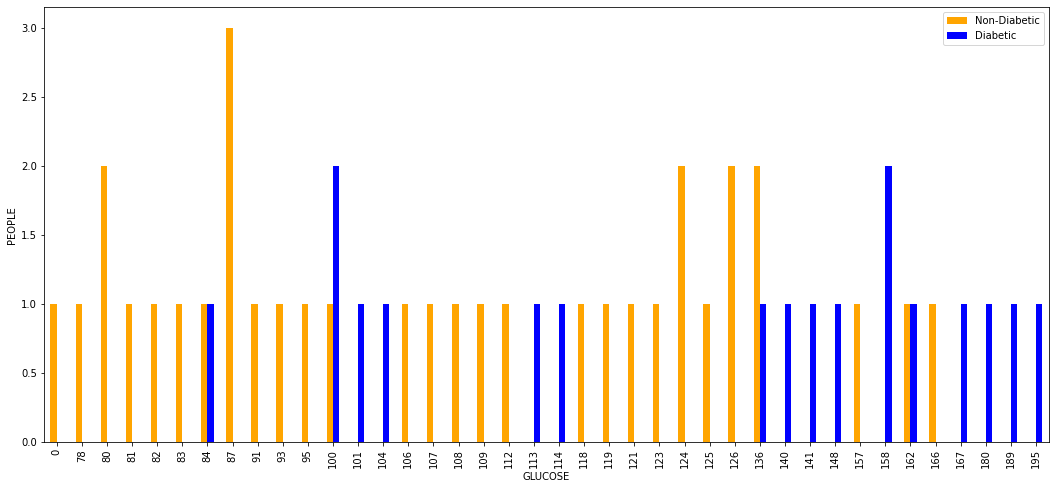

In [4]:
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["Orange","Blue"])
plt.ylabel("PEOPLE")
plt.xlabel("GLUCOSE")
#plt.xticks(rotation=0)
plt.legend(["Non-Diabetic","Diabetic"])

Now, finding Blood Pressure levels and age of entries in dataset having Diabetes 

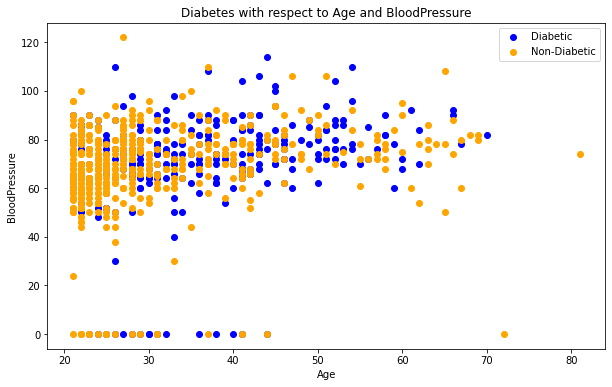

In [5]:
plt.figure(figsize=(10,6))
#Plotting Scatter graph of People with Positive and Negative Diabetes
#Positive Data
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Blue")
#Negative Data
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="Orange")

#ADDING INFORMATION IN THE GRAPH
plt.title("Diabetes with respect to Age and BloodPressure")
plt.xlabel("Age")
plt.ylabel("BloodPressure")
plt.legend(["Diabetic","Non-Diabetic"])

Now, PairPlotting graph to check the BloodPressure, Glucose, Age, BMI, SkinThickness, Pregnencies and Insulin with respect to Outcome

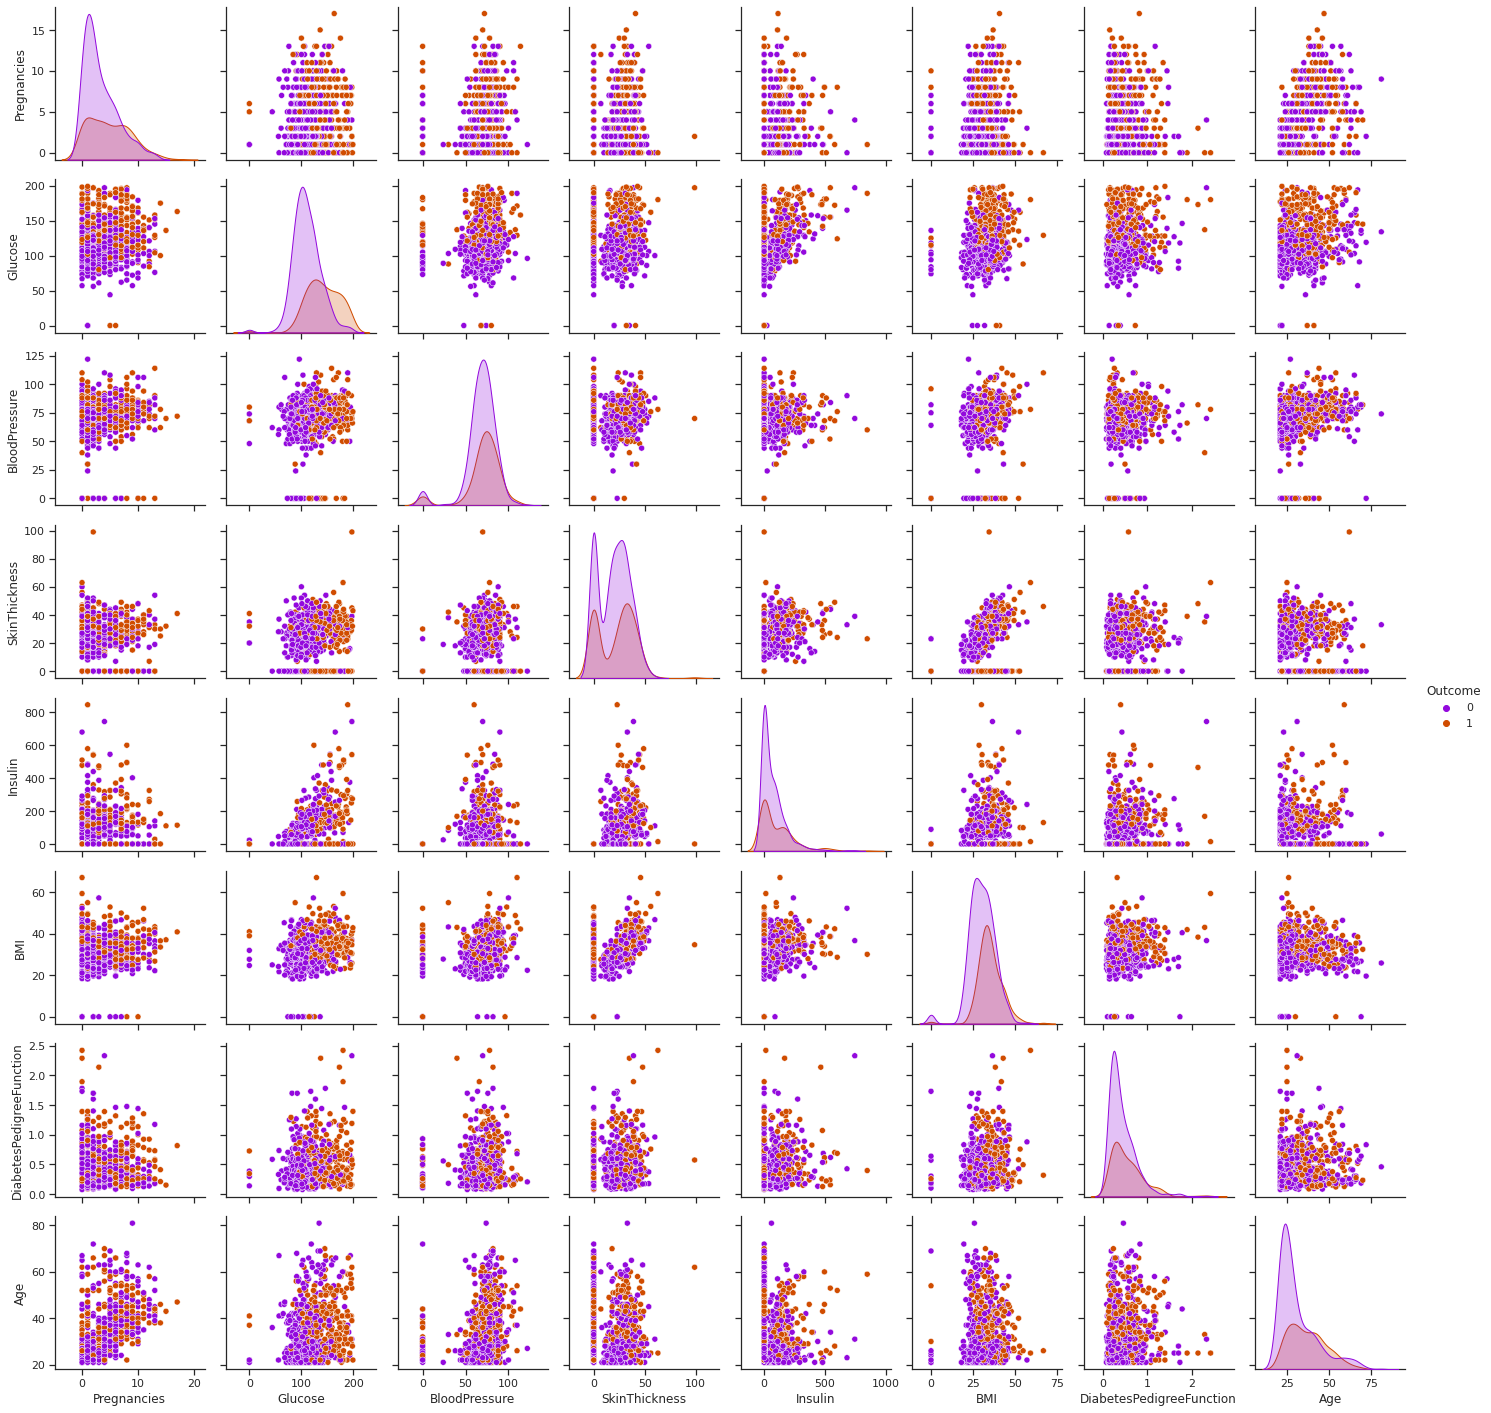

In [6]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue="Outcome",palette="gnuplot");

Now, We will check with plotting of all the columns of the people having Diabetes

(array([67., 46., 44., 16., 47., 28.,  7.,  9.,  3.,  1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

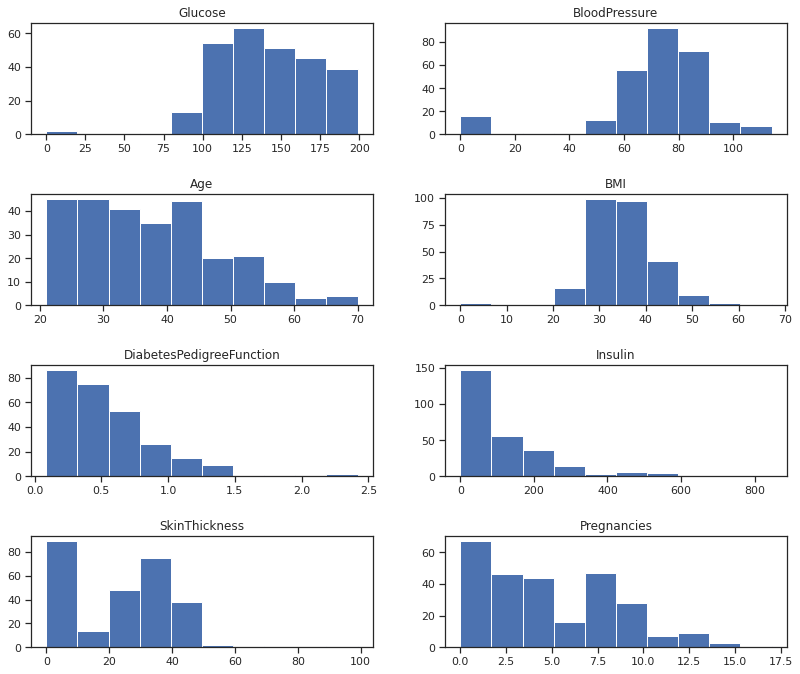

In [7]:
fig, axis = plt.subplots(nrows= 4, ncols=2, figsize=(12,10))
fig.tight_layout(pad=3)

Diabetic = data.Outcome ==1
axis[0,0].set_title('Glucose')
axis[0,0].hist(data.Glucose[Diabetic])

axis[0,1].set_title('BloodPressure')
axis[0,1].hist(data.BloodPressure[Diabetic])

axis[1,0].set_title('Age')
axis[1,0].hist(data.Age[Diabetic])

axis[1,1].set_title('BMI')
axis[1,1].hist(data.BMI[Diabetic])

axis[2,0].set_title('DiabetesPedigreeFunction')
axis[2,0].hist(data.DiabetesPedigreeFunction[Diabetic])

axis[2,1].set_title('Insulin')
axis[2,1].hist(data.Insulin[Diabetic])

axis[3,0].set_title('SkinThickness')
axis[3,0].hist(data.SkinThickness[Diabetic])

axis[3,1].set_title('Pregnancies')
axis[3,1].hist(data.Pregnancies[Diabetic])




In [8]:
corr_data=data.corr()
corr_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Printing Correlation matrix between columns to show positive or negative correlation between columns present in dataset

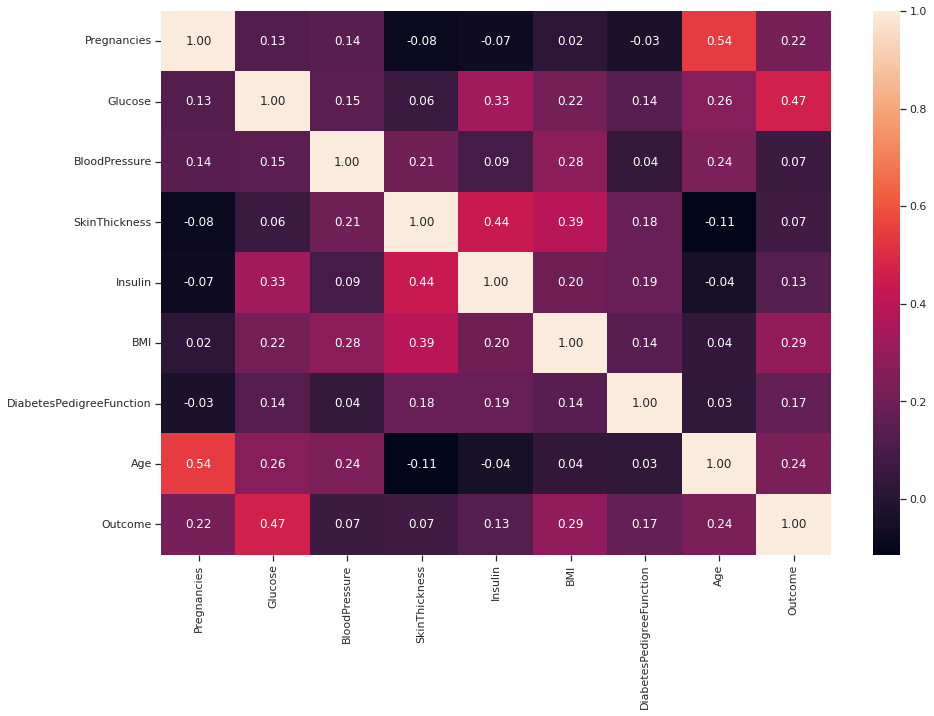

In [9]:
fig,axis = plt.subplots(figsize=(15, 10))
axis = sns.heatmap(corr_data,annot =True , fmt=".2f")

Now, lets split data and check

In [10]:
pip install sklearn

In [11]:
from sklearn.model_selection import train_test_split
data.sample(frac=1)
data_x=data.drop("Outcome",axis=1)
data_y=data["Outcome"]

#print(data_x)
#print(data_y)

train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.2)

Here, I will evalute with different models to find the best fit

# Building Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression
#Model Building
model_lr= LogisticRegression(random_state=0)
model_lr.fit(train_x,train_y)

#Model Evaluation
model_lr = model_lr.score(test_x,test_y)


model_lr

0.8311688311688312

# Building KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
#Building Model
model_knn = KNeighborsClassifier()
model_knn.fit(train_x,train_y)

#Model Evaluation
model_knn = model_knn.score(test_x,test_y)

model_knn

0.7792207792207793

# Building Support Vector Classifier

In [14]:
from sklearn import svm
#Model Building
model_svm = svm.SVC()
model_svm.fit(train_x,train_y)

#Model Evaluation
model_svm = model_svm.score(test_x,test_y)


model_svm

0.8116883116883117

# Building Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
#Model Builing
model_rfc = RandomForestClassifier()
model_rfc.fit(train_x,train_y)

#Model Evaluation
model_rfc = model_rfc.score(test_x,test_y)

model_rfc

0.7857142857142857

Now, We will compare all the models and check whose accuracy is best

          LogisticRegression  ...  Random Forest Classifier
Accuracy            0.831169  ...                  0.785714

[1 rows x 4 columns]


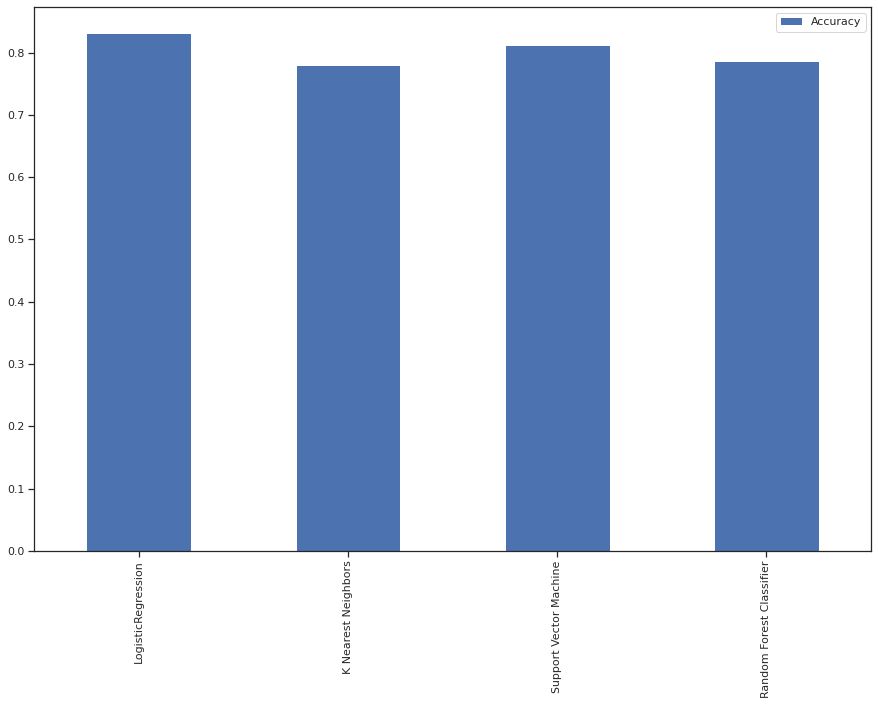

In [16]:
comparsion_model = pd.DataFrame({"LogisticRegression":model_lr , 
                                 "K Nearest Neighbors":model_knn , 
                                 "Support Vector Machine":model_svm , 
                                 "Random Forest Classifier":model_rfc}, 
                                  index=["Accuracy"])
print(comparsion_model)
comparsion_model.T.plot.bar(figsize = (15,10))

On Comparing all the models, we can see that Logistic Regression and Support Vector Machine performed really well, Also trying it with Hyperparameteruning we can improve Accuracy of the model

Hyperparameter tuning using GridSearchcv

In [17]:
from sklearn.model_selection import GridSearchCV
model_lr_grid= {'C': np.logspace(-4,4,30), 
                "solver":["liblinear"]}

#Setting up Grid

model_lr_set= GridSearchCV(LogisticRegression(),
                           param_grid = model_lr_grid, 
                           cv =5, 
                           verbose = True)

#Fitting GridSearchcv

model_lr_set.fit(train_x,train_y)
model_score = model_lr_set.score(test_x,test_y)

print(model_score*100)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
83.76623376623377


As we can see we have Accuracy improvement with 83.77%

Model Evaluation 

In [18]:
prediction = model_lr_set.predict(test_x)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

Checking Confusion matrix

Text(0.5, -10.5, 'True Label')

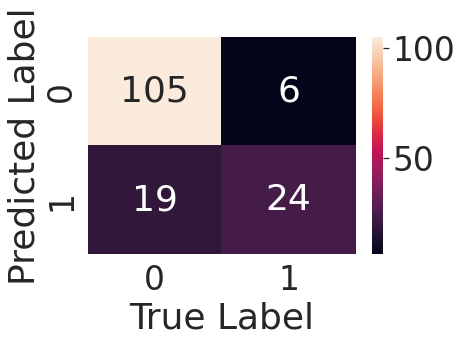

In [19]:
sns.set(font_scale= 3)
sns.heatmap(confusion_matrix(test_y,prediction), annot=True , fmt='g')
plt.ylabel("Predicted Label")
plt.xlabel("True Label")

Checking accuracy score

In [20]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(test_y,prediction)
print(acc_score*100)

83.76623376623377


Cheking Classification Report 

In [21]:
report=classification_report(test_y,prediction)

print(report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       111
           1       0.80      0.56      0.66        43

    accuracy                           0.84       154
   macro avg       0.82      0.75      0.78       154
weighted avg       0.83      0.84      0.83       154



Saving and Loading model

In [22]:
import pickle

#Saving our trained model to a file so that we can connect it with the Application
pickle.dump(model_lr_set, open ("Diabetes_Pred.pkl" , "wb"))


model_loaded = pickle.load(open("Diabetes_Pred.pkl" , "rb"))
model_loaded.predict(test_x)
model_loaded.score(test_x,test_y)

0.8376623376623377